In [1]:
import mxnet as mx
from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
mx.random.seed(42)
x = mx.random.uniform(shape=(10,3))
y = mx.random.uniform(shape=(10,1))

In [3]:
# Once we have our data in ndArray. We can use gluon.data.dataset.ArrayDataset to create the gluon dataset
dataset = gluon.data.dataset.ArrayDataset(x,y)

In [4]:
sample = dataset[4]
sample

(
 [0.74707687 0.37641123 0.46362457]
 <NDArray 3 @cpu(0)>,
 
 [0.35440788]
 <NDArray 1 @cpu(0)>)

In [5]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
test_dataset = gluon.data.vision.datasets.MNIST(train=False)

In [6]:
sample_image = train_dataset[19][0]
print(sample_image.shape)

(28, 28, 1)


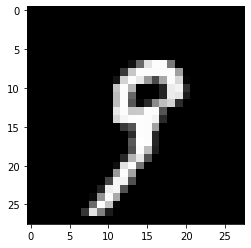

In [7]:
imshow(sample_image[:,:,0].asnumpy(), cmap='gray')

In [8]:
# ImageFolder Datasets
# image_datasets = gluon.data.vision.datasets.ImageFolderDataset('path_to_folder')

# Custom Dataset

In [9]:
class MyCustomDataset(gluon.data.Dataset):
    def __init__(self, dict_data):
        self.dict_data = dict_data
        self.dict_keys = list(dict_data.keys())
    
    def __getitem__(self, idx):
        return self.dict_data[self.dict_keys[idx]]
    
    def __len__(self):
        return len(self.dict_data)
    

In [10]:
dataset = MyCustomDataset({
    'a':mx.nd.array(1,),
    'b':mx.nd.array(2,),
    'c':mx.nd.array(3,)
})


In [11]:
dataset[2]


3.0
<NDArray  @cpu(0)>

## Gluon Transformation

In [12]:
def transform_fn(data, label):
    data = data.astype('float32') / 225
    return data, label

In [13]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True).transform(transform_fn)
test_dataset = gluon.data.vision.datasets.MNIST(train=False).transform(transform_fn)

In [14]:
sample_image = train_dataset[19][0]
nd.max(sample_image)


[1.1333333]
<NDArray 1 @cpu(0)>

### Vision Transforms
gluon.data.vision.transforms has implemented transformation function that are common in computer vision

In [15]:
from mxnet import gluon, nd
from mxnet.gluon.data.vision import transforms

## ToTensor Transformation
Convert an image NDArray of shape(H,W,C) in range[0,255] to a goat tensor NDArray of shape(C,H,W) in the range[0,1)

In [16]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
train_dataset[19][0].shape

(28, 28, 1)

In [17]:
to_tensor = transforms.ToTensor()
train_dataset = train_dataset.transform_first(to_tensor)  # apply transform to image not label
train_dataset[19][0].shape

(1, 28, 28)

In [18]:
# if apply transformation to both image and label then use .transform method


### Normalize
Normalize a tensor of ahspe (C,H,W) with mean and standard deviation

In [19]:
mean, std = (0.1307,),(0.3081,)
normalize = transforms.Normalize(mean, std)
train_dataset = train_dataset.transform_first(normalize)

### Compose
Sequentially compose multiple transformation


In [20]:
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [21]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True).transform(transform_fn)

### Data Augmentation via Transformation
Reduce Overfitting

* transforms.Resize
* transforms.CenterCrop
* transforms.RandomSizedCrop
* transforms.RandomFlipLeftRight
* transfomrs.RandomBrightness

## Gluon DataLoaders
mini-batch of data from dataset

In [22]:
mx.random.seed(42)
X = mx.random.uniform(shape=(10,3))
y = mx.random.uniform(shape=(10,1))
dataset = gluon.data.dataset.ArrayDataset(X,y)

In [24]:
data_loader = gluon.data.DataLoader(dataset, batch_size=5, last_batch='keep')
for X_batch, y_batch in data_loader:
    print("X_batch has shape {} and y_batch has shape {}".format(X_batch.shape, y_batch.shape))

X_batch has shape (5, 3) and y_batch has shape (5, 1)
X_batch has shape (5, 3) and y_batch has shape (5, 1)


In [25]:
# Parallel Data Loading
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()

In [27]:
data_loader = gluon.data.DataLoader(dataset, batch_size=5, num_workers=CPU_COUNT)
for X_batch, y_batch in data_loader:
    print("X_batch has shape {} and y_batch has shape {}".format(X_batch.shape, y_batch.shape))

X_batch has shape (5, 3) and y_batch has shape (5, 1)
X_batch has shape (5, 3) and y_batch has shape (5, 1)


In [28]:
from mxnet.gluon.data.vision import transforms

In [29]:
train_dataset = gluon.data.vision.datasets.MNIST(train=True)
test_dataset = gluon.data.vision.datasets.MNIST(train=False)


In [30]:
transform = transforms.Compose([
    transforms.RandomFlipTopBottom(),
    transforms.RandomFlipLeftRight()
])

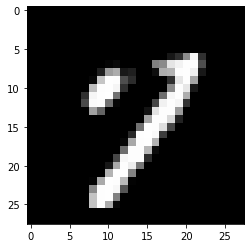

In [31]:
train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform), batch_size=5, shuffle=True)
for X_batch, y_batch in train_dataloader:
    imshow(X_batch[3,:,:,0].asnumpy(), cmap='gray')
    break